In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = pd.read_csv('../datasets/car_sales.csv')
data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [12]:
data['Date'] = pd.to_datetime(data['Date'])

data = data.dropna()

# data

In [13]:
data.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [15]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# 1. Sales Over Time
data['YearMonth'] = data['Date'].dt.to_period('M')
sales_over_time = data.groupby('YearMonth').size()

print(sales_over_time)

YearMonth
2022-01     315
2022-02     320
2022-03     705
2022-04     800
2022-05     750
2022-06     690
2022-07     700
2022-08     810
2022-09    1475
2022-10     835
2022-11    1619
2022-12    1625
2023-01     475
2023-02     415
2023-03     830
2023-04     855
2023-05    1145
2023-06    1025
2023-07    1025
2023-08     895
2023-09    1830
2023-10     995
2023-11    1850
2023-12    1921
Freq: M, dtype: int64


## car sale over time

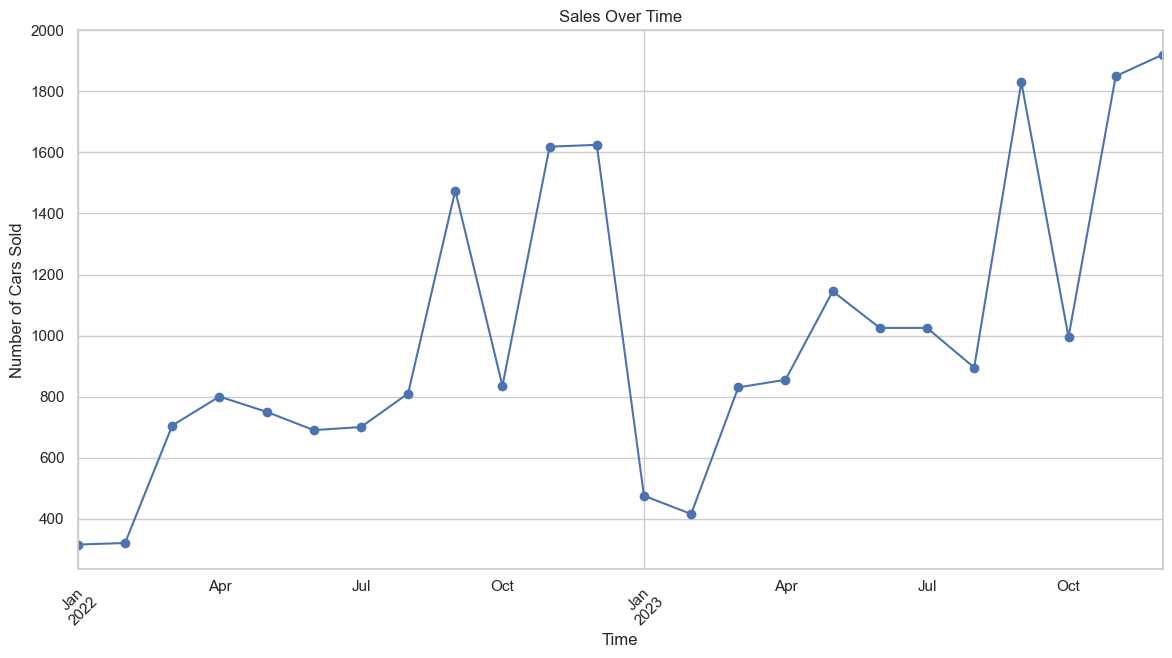

In [35]:
plt.figure(figsize=(14, 7))
sales_over_time.plot(kind='line', marker='o')
# plt.scatter(sales_over_time.index, sales_over_time.values)
plt.title('Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## car sale by companies

C:\Users\hamma\AppData\Local\Temp\ipykernel_11508\2347164971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_company.index, y=sales_by_company.values, palette='viridis')


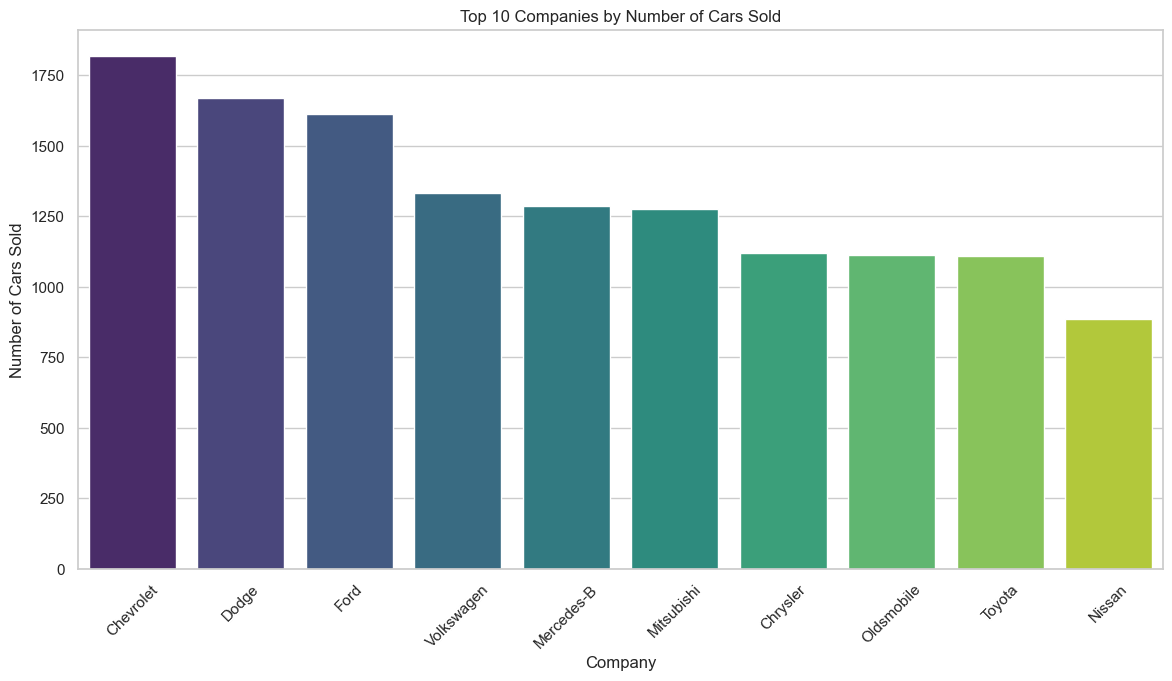

In [33]:

# 2. Sales by Company
sales_by_company = data['Company'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_company.index, y=sales_by_company.values, palette='viridis')
plt.title('Top 10 Companies by Number of Cars Sold')
plt.xlabel('Company')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

## car sale by region

C:\Users\hamma\AppData\Local\Temp\ipykernel_11508\3156035278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='magma')


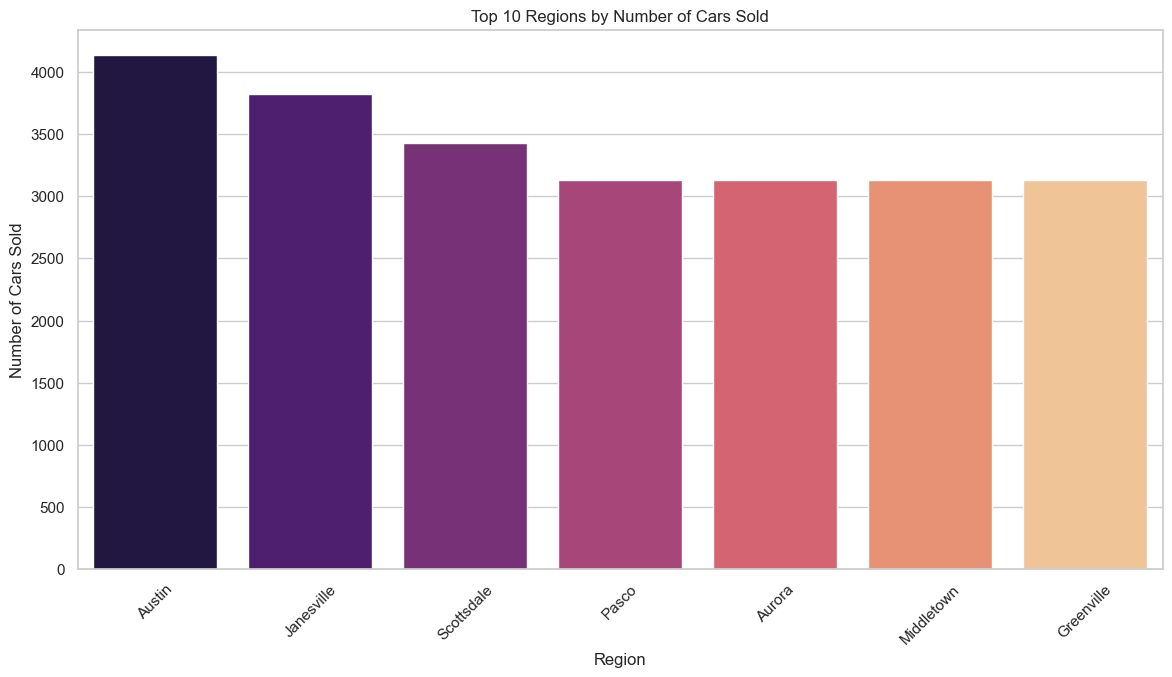

In [36]:
# 3. Sales by Region
sales_by_region = data['Dealer_Region'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='magma')
plt.title('Top 10 Regions by Number of Cars Sold')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

## car sale by model and body style

C:\Users\hamma\AppData\Local\Temp\ipykernel_11508\3513188261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_model.index, y=sales_by_model.values, palette='coolwarm')


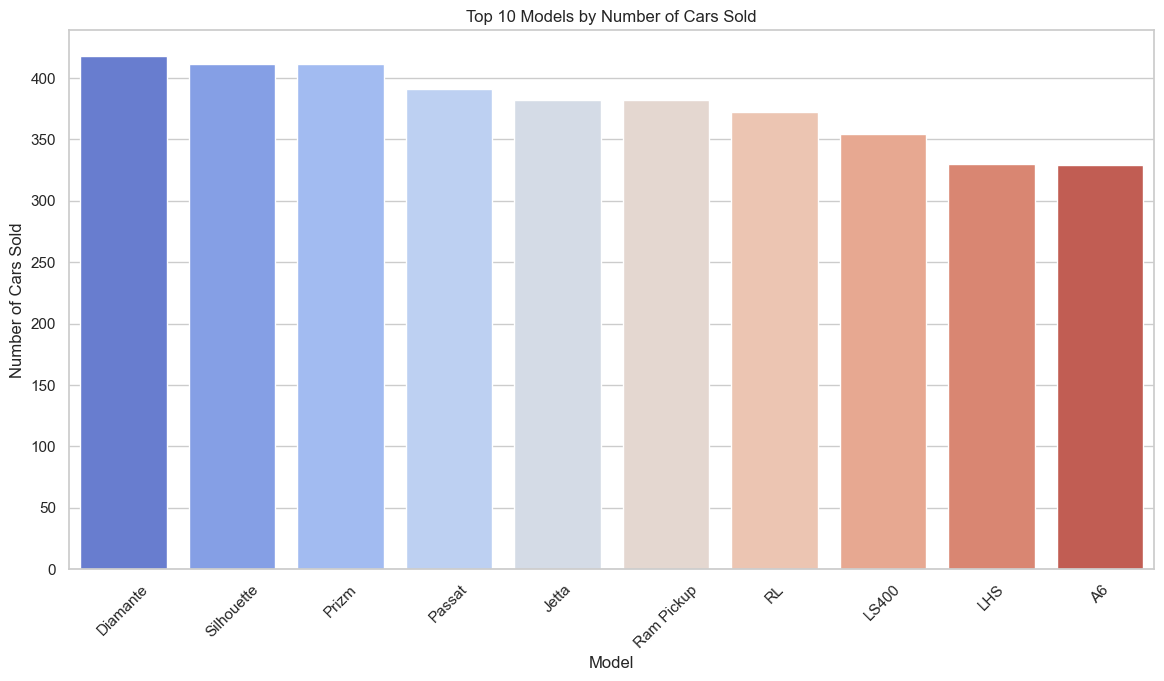

C:\Users\hamma\AppData\Local\Temp\ipykernel_11508\3513188261.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_body_style.index, y=sales_by_body_style.values, palette='Blues')


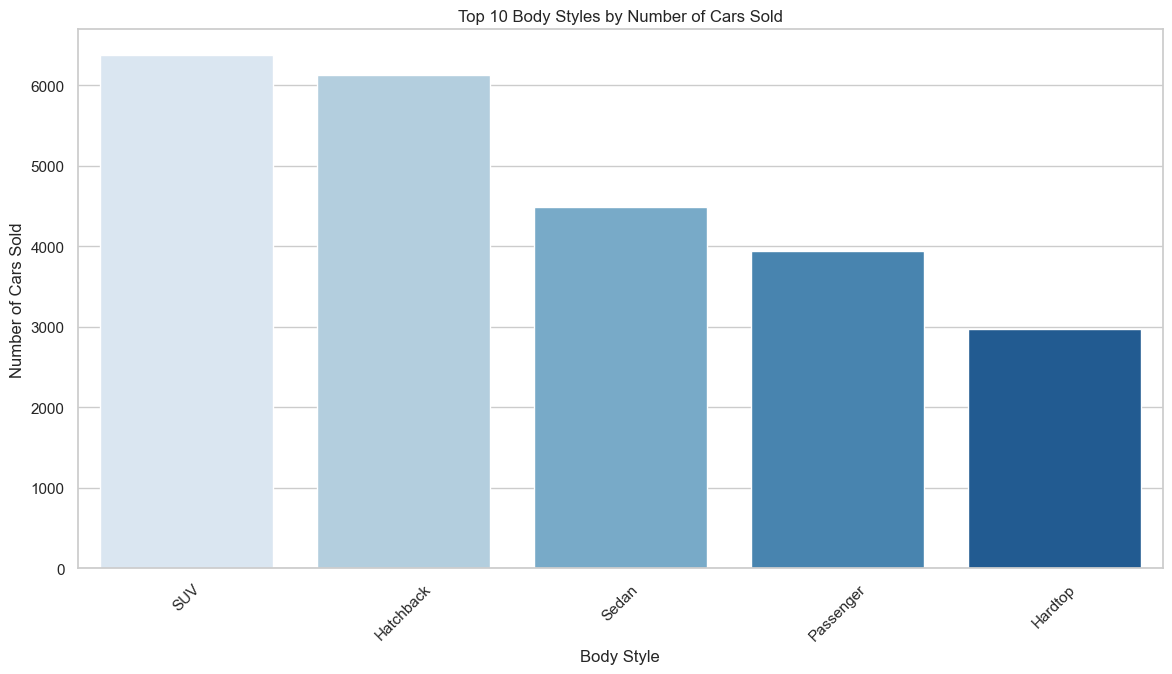

In [37]:
sales_by_model = data['Model'].value_counts().head(10)
sales_by_body_style = data['Body Style'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_model.index, y=sales_by_model.values, palette='coolwarm')
plt.title('Top 10 Models by Number of Cars Sold')
plt.xlabel('Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x=sales_by_body_style.index, y=sales_by_body_style.values, palette='Blues')
plt.title('Top 10 Body Styles by Number of Cars Sold')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

## impact of customer income on sale

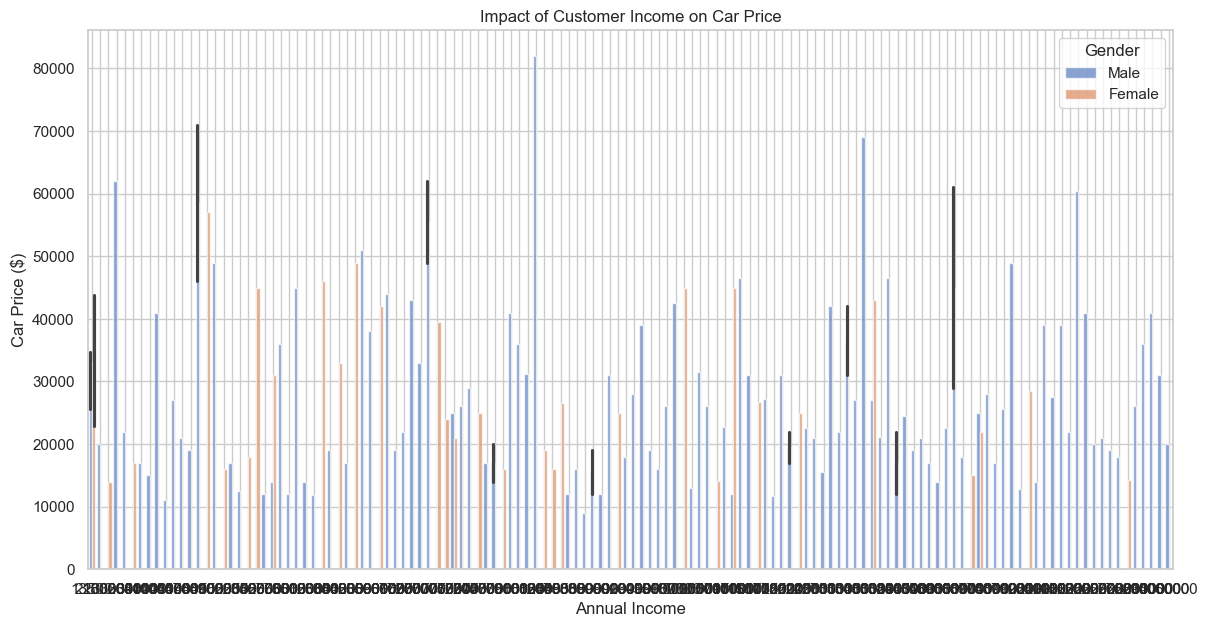

In [40]:
plt.figure(figsize=(14, 7))
sns.barplot(data=data.head(200), x='Annual Income', y='Price ($)', hue='Gender', alpha=0.7, palette='muted')
plt.title('Impact of Customer Income on Car Price')
plt.xlabel('Annual Income')
plt.ylabel('Car Price ($)')
plt.grid(True)
plt.show()
